<a href="https://colab.research.google.com/github/jshimpi02/ECGsignalpro/blob/main/ECG_Signal__Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>ECG Signal Processing for Health Monitoring</h1>

<h2>Installing Dependencies</h2>

In [ ]:
!pip install pywavelets wfdb numpy matplotlib scipy scikit-learn tensorflow


In [ ]:
import pywt
import wfdb
print("All libraries installed successfully!")

All libraries installed successfully!


<h2>Load and Visualize ECG Data from MIT-BIH Arrhythmia Database </h2>

In [ ]:
!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/ -P /content/mitdb/

Streaming output truncated to the last 5000 lines.
Length: 5468 (5.3K) [application/octet-stream]
Saving to: ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/223.atr’

physionet.org/files 100%[===================>]   5.34K  --.-KB/s    in 0s      

2025-03-08 21:48:28 (1.43 GB/s) - ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/223.atr’ saved [5468/5468]

--2025-03-08 21:48:28--  https://physionet.org/files/mitdb/1.0.0/223.dat
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1950000 (1.9M) [application/octet-stream]
Saving to: ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/223.dat’

physionet.org/files 100%[===================>]   1.86M   449KB/s    in 4.2s    

2025-03-08 21:48:32 (449 KB/s) - ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/223.dat’ saved [1950000/1950000]

--2025-03-08 21:48:32--  https://physionet.org/files/mitdb/1.0.0/223.hea
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting respon

In [ ]:
!ls /content/mitdb/

100.atr    105.atr  111.atr  116.dat  122.atr  202.dat	209.at_  214.xws  221.xws  231.xws
100.dat    105.dat  111.dat  116.hea  122.dat  202.hea	209.atr  215.at_  222.at_  232.atr
100.hea    105.hea  111.hea  116.xws  122.hea  202.xws	209.dat  215.atr  222.atr  232.dat
100.xws    105.xws  111.xws  117.at_  122.xws  203.at-	209.hea  215.dat  222.dat  232.hea
101.atr    106.atr  112.atr  117.atr  123.atr  203.at_	209.xws  215.hea  222.hea  232.xws
101.dat    106.dat  112.dat  117.dat  123.dat  203.atr	210.atr  215.xws  222.xws  233.atr
101.hea    106.hea  112.hea  117.hea  123.hea  203.dat	210.dat  217.atr  223.atr  233.dat
101.xws    106.xws  112.xws  117.xws  123.xws  203.hea	210.hea  217.dat  223.dat  233.hea
102-0.atr  107.atr  113.atr  118.atr  124.atr  203.xws	210.xws  217.hea  223.hea  233.xws
102.atr    107.dat  113.dat  118.dat  124.dat  205.atr	212.atr  217.xws  223.xws  234.atr
102.dat    107.hea  113.hea  118.hea  124.hea  205.dat	212.dat  219.atr  228.atr  234.dat
102.hea   

In [ ]:
!wget -r -N -c -np -P /content/mitdb/ https://physionet.org/files/mitdb/1.0.0/

--2025-03-08 21:50:20--  https://physionet.org/files/mitdb/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/index.html’

physionet.org/files     [ <=>                ]  22.86K  --.-KB/s    in 0.01s   

Last-modified header missing -- time-stamps turned off.
2025-03-08 21:50:21 (1.55 MB/s) - ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/index.html’ saved [23410]

Loading robots.txt; please ignore errors.
--2025-03-08 21:50:21--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2025-03-08 21:50:21--  https://physionet.org/files/mitdb/1.0.0/mitdbdir/
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting

In [ ]:
!ls /content/mitdb/

In [ ]:
!wget -r -N -c -np -P /content/mitdb/ https://physionet.org/files/mitdb/1.0.0/

--2025-03-08 21:50:48--  https://physionet.org/files/mitdb/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/index.html’

physionet.org/files     [ <=>                ]  22.86K  --.-KB/s    in 0.02s   

Last-modified header missing -- time-stamps turned off.
2025-03-08 21:50:49 (1.28 MB/s) - ‘/content/mitdb/physionet.org/files/mitdb/1.0.0/index.html’ saved [23410]

Loading robots.txt; please ignore errors.
--2025-03-08 21:50:49--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2025-03-08 21:50:49--  https://physionet.org/files/mitdb/1.0.0/mitdbdir/
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting

In [ ]:
!mv /content/mitdb/physionet.org/files/mitdb/1.0.0/* /content/mitdb/

In [ ]:
!ls /content/mitdb/

<h2>Load and Visualize ECG Data</h2>

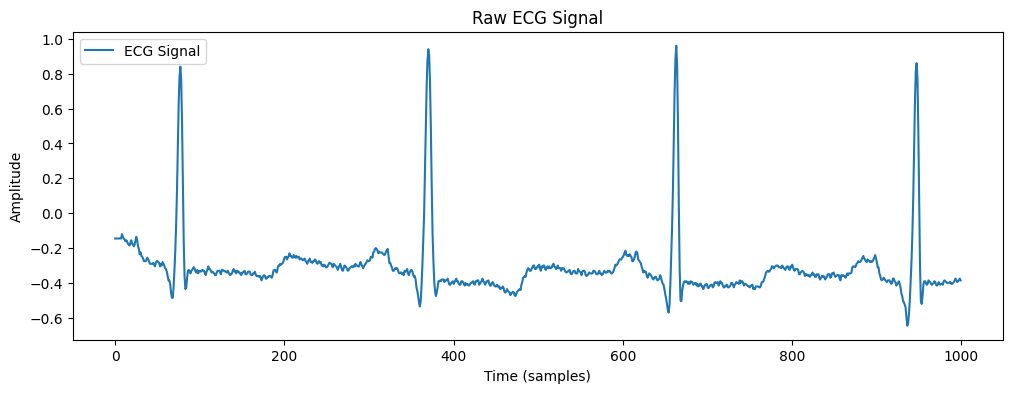

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Load ECG Record (100th patient data)
record = wfdb.rdrecord('/content/mitdb/100', sampto=1000)
annotation = wfdb.rdann('/content/mitdb/100', 'atr')

# Extract ECG signal
ecg_signal = record.p_signal[:, 0]

# Plot the ECG Signal
plt.figure(figsize=(12, 4))
plt.plot(ecg_signal, label="ECG Signal")
plt.title("Raw ECG Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

<h2>Preprocess the Signal (Filter Noise)</h2>
<p>Applying a bandpass filter to remove unwanted noise.</p>

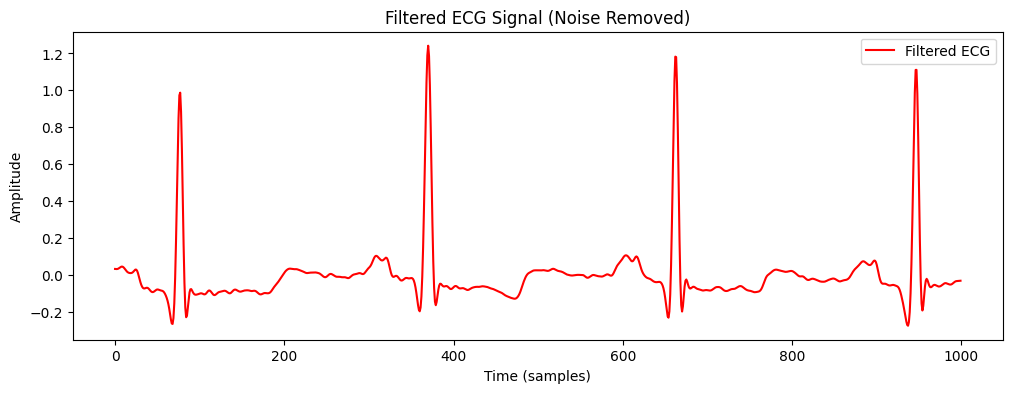

In [ ]:
from scipy.signal import butter, filtfilt

# Bandpass Filter Function
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut=0.5, highcut=40, fs=360, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

# Apply Filtering
fs = 360  # Sampling frequency
filtered_ecg = butter_bandpass_filter(ecg_signal, 0.5, 40, fs)

# Plot Filtered Signal
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG", color='red')
plt.title("Filtered ECG Signal (Noise Removed)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


<h2>Feature Extraction</h2>

<h3>Computing Fourier Transform (FFT)</h3>

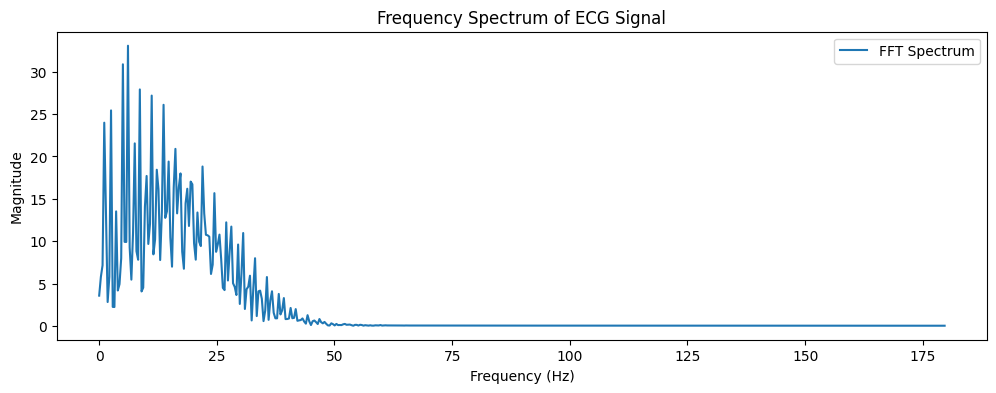

In [ ]:
fft_vals = np.abs(np.fft.fft(filtered_ecg))
fft_freqs = np.fft.fftfreq(len(filtered_ecg), 1/fs)

plt.figure(figsize=(12, 4))
plt.plot(fft_freqs[:len(fft_freqs)//2], fft_vals[:len(fft_vals)//2], label="FFT Spectrum")
plt.title("Frequency Spectrum of ECG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

<h3>Appling Wavelet Transform</h3>

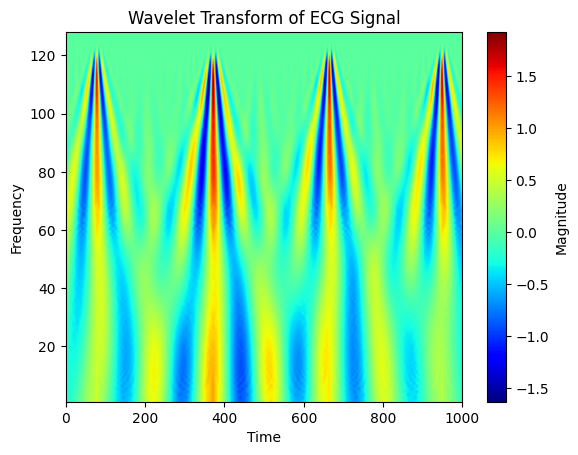

In [ ]:
import pywt

# Apply Continuous Wavelet Transform (CWT)
coeffs, freqs = pywt.cwt(filtered_ecg, np.arange(1, 128), 'morl', sampling_period=1/fs)

plt.imshow(coeffs, aspect='auto', cmap='jet', extent=[0, len(filtered_ecg), 1, 128])
plt.colorbar(label="Magnitude")
plt.title("Wavelet Transform of ECG Signal")
plt.ylabel("Frequency")
plt.xlabel("Time")
plt.show()

<h2>Train Machine Learning Model using Support Vector Machine (SVM)</h2>

<h3>Prepare Data for Training:</h3>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Simulated feature matrix (Replace with actual extracted features)
X = np.random.rand(1000, 10)  # 1000 samples, 10 extracted features
y = np.random.randint(0, 2, 1000)  # 0 (Normal) or 1 (Abnormal)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Train SVM Classifier</h3>

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Performance Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       113
           1       0.47      0.48      0.48        87

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.54      0.54      0.54       200



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape for CNN input
X_train = X_train.reshape(-1, 10, 1)
X_test = X_test.reshape(-1, 10, 1)

In [ ]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary Classification (Normal vs Abnormal)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5034 - loss: 0.6948 - val_accuracy: 0.5350 - val_loss: 0.6921
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4931 - loss: 0.6930 - val_accuracy: 0.5050 - val_loss: 0.6936
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5618 - loss: 0.6918 - val_accuracy: 0.5200 - val_loss: 0.6917
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5262 - loss: 0.6910 - val_accuracy: 0.5150 - val_loss: 0.6913
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5249 - loss: 0.6919 - val_accuracy: 0.5450 - val_loss: 0.6900
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5266 - loss: 0.6889 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6312 - loss: 0.6837 - val_accuracy: 0.4600 - val_loss: 0.7004
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5438 - loss: 0.6875 - val_accuracy: 0.4950 - val_loss: 0.6952
Ep

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate Accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {svm_accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Evaluate CNN Model
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {cnn_accuracy:.2f}")

In [ ]:
# Check current shape
print(f"Original X_train shape: {X_train.shape}")

# Reshape 3D → 2D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"Flattened X_train shape: {X_train_flat.shape}")  # Should be (num_samples, num_features)


Original X_train shape: (800, 10, 1)
Flattened X_train shape: (800, 10)


In [ ]:
print(f"Shape of X_train: {X_train.shape}")

Shape of X_train: (800, 10, 1)


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flattening to (num_samples, num_features)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 5 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Print variance ratio to check retained information
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.11752835 0.11268981 0.10961565 0.10623689 0.09908827]


In [ ]:
svm_model_pca = SVC(kernel='rbf')
svm_model_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_model_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.42      0.34      0.38        98
           1       0.47      0.56      0.51       102

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.44       200
weighted avg       0.45      0.45      0.44       200

